In [10]:
import pandas as pd
import numpy as np
import seaborn as sns #
sns.set_style("whitegrid") # Style of Graph
import matplotlib.pyplot as plt
import sklearn # All ML Model are present in it

In [11]:
dataf = pd.read_csv("matches.csv")
dataf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
dataf.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [13]:
dataf.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [14]:
dataf.groupby

<bound method DataFrame.groupby of         id  season           city        date                        team1   
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad  \
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           t

In [15]:
# Null Values in each coloumn

dataf.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [16]:
# Umire 3 is missing 637 times -->> Remove coloumn

# We need to Drop the coloumn use implace = TRUE

dataf = dataf.iloc[:, :-1]
dataf.dropna(inplace = True)
dataf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [17]:
# Again checking for Null Values

dataf.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [18]:
dataf['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [19]:
# Removing Errors
# FOR DELHI

dataf['team1'] = dataf['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')

# str.replace --> String Replacing

In [20]:
# For Second Coloumn

dataf['team2'] = dataf['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

# For Third --> 'WINNER' Coloumn

dataf['winner'] = dataf['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')


In [21]:
# For Hyderabad

dataf['team1'] = dataf['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
dataf['team2'] = dataf['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
dataf['team2'] = dataf['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')


In [22]:
dataf['team1'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Capitals',
       'Rajasthan Royals', 'Chennai Super Kings', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants'], dtype=object)

In [23]:
dataf['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Capitals',
       'Rajasthan Royals', 'Chennai Super Kings', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants'], dtype=object)

In [24]:
dataf['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Mumbai Indians',
       'Delhi Capitals', 'Gujarat Lions', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype=object)

Text(0.5, 1.0, 'Number of Matches Won by each time')

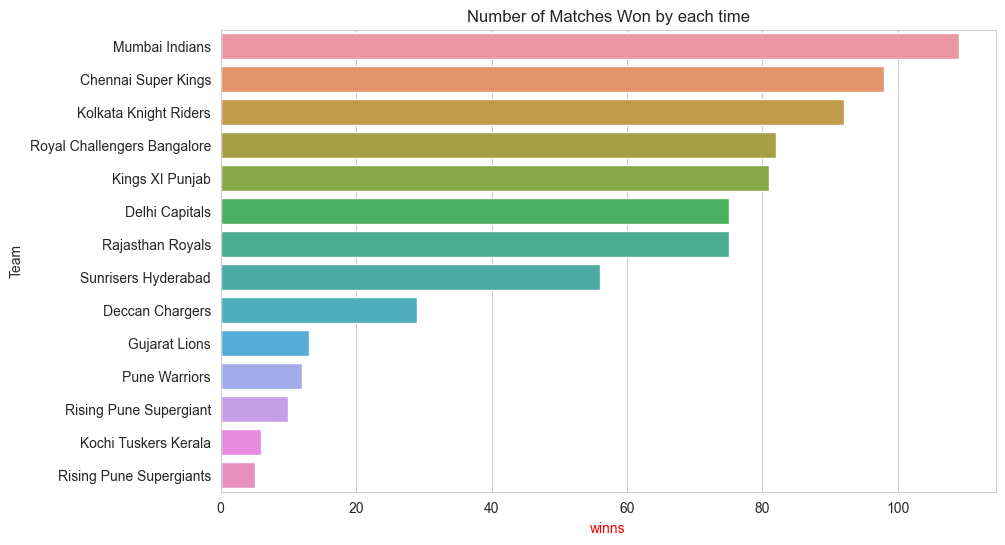

In [27]:
# Visualizing The Datasets

plt.figure(figsize = (10,6))
sns.countplot(y = 'winner', data = dataf, order=dataf['winner'].value_counts().index)
plt.xlabel('winns', color = "red")
plt.ylabel('Team')
plt.title('Number of Matches Won by each time')

# seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

Text(0.5, 1.0, 'Total Number of matches played in Stadium')

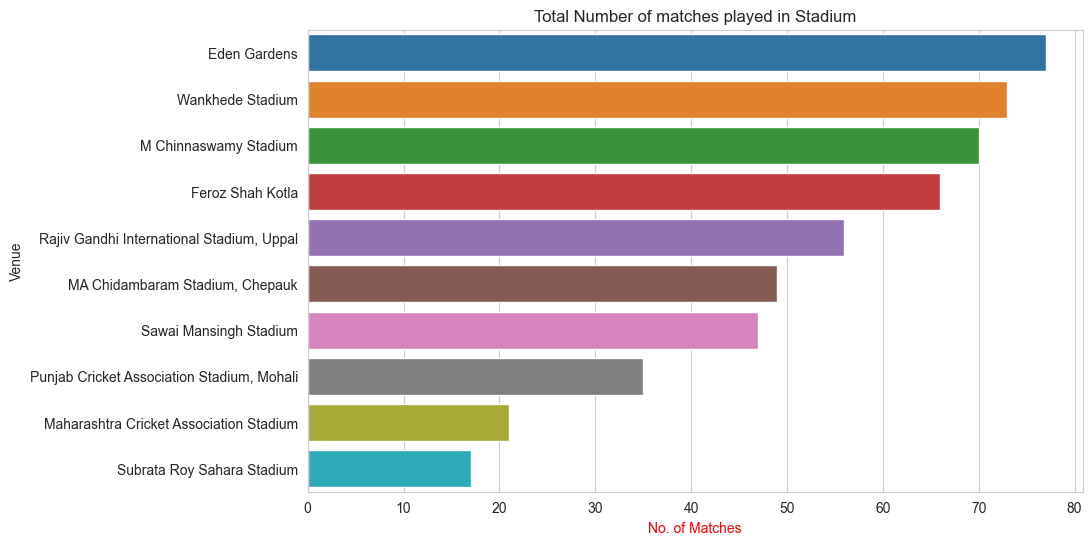

In [32]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue', data = dataf, order=dataf['venue'].value_counts().iloc[:10].index)
# Using Iloc to Control Numbers of Stadium / Venue
plt.xlabel('No. of Matches', color = "red")
plt.ylabel('Venue')
plt.title('Total Number of matches played in Stadium')

Text(0.5, 1.0, 'Toss Decision')

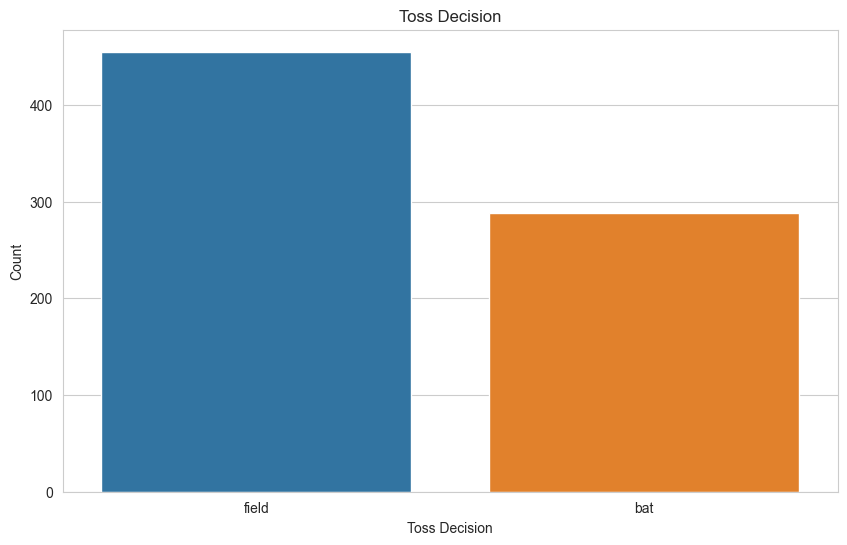

In [34]:
#Teams Choose to Bowl and Bat First

plt.figure(figsize=(10,6))
sns.countplot(x="toss_decision", data = dataf)
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.title("Toss Decision")

### **FEATURE ENGINEERING**

In [37]:
dataf.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [38]:
# Columns we don't require for predicting Values
# Let's drop it out --> venue, umpire1, umpire2   

dataf.drop(['id', 'venue', 'city', 'date', 'umpire1', 'umpire2', 'player_of_match'], axis=1, inplace =True)

In [39]:
dataf.head(10)

,season,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,2017,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,2017,Rising Pune Supergiant,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,2017,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,2017,Kings XI Punjab,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
5,2017,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9
6,2017,Mumbai Indians,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4
7,2017,Kings XI Punjab,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8
8,2017,Rising Pune Supergiant,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0
9,2017,Mumbai Indians,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4
10,2017,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8


In [40]:
dataf.drop(['season'], axis=1, inplace=True) 

In [41]:
dataf.head(10)

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Rising Pune Supergiant,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,Kings XI Punjab,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
5,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9
6,Mumbai Indians,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4
7,Kings XI Punjab,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8
8,Rising Pune Supergiant,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0
9,Mumbai Indians,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4
10,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8


In [42]:
# Dropping value beacuse I wan't to predict Winner

x = dataf.drop(['winner'], axis = 1)
y = dataf['winner']

In [44]:
x = pd.get_dummies(x,['team1', 'team2', 'toss_winner', 'toss_decision', 'result'], drop_first=True)

In [45]:
x

,dl_applied,win_by_runs,win_by_wickets,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Pune Warriors,...,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_tie
0,0,35,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0,7,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,10,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
3,0,0,6,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,0,0,9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0,0,6,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
751,0,0,9,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
752,0,0,6,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
754,0,0,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [46]:
# Using ENCODER
# LABEL ENCODER

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Transform y 
y =le.fit_transform(y)

In [48]:
y

# Converted into some Number instead of Some Names

array([13, 10,  6,  4, 13,  7,  4,  2,  7,  6,  7,  3,  6,  2,  7, 10,  6,
       13, 12, 13,  7,  3,  7, 10,  4,  6, 10,  6,  3,  6, 13, 10,  7,  4,
       13,  7, 10,  2, 10,  2,  4, 10,  7,  6,  3, 13,  4,  2,  4,  2, 13,
        7, 10, 12, 10,  6,  7,  7,  6,  0,  2, 12,  6,  9,  2,  0,  9,  4,
        9,  0,  1,  4,  0,  7,  2,  4,  9,  2, 12,  4,  7,  9,  4,  1,  7,
        0,  6,  9,  7,  0,  6,  9,  4,  6,  7,  4,  2,  7,  4,  9,  7,  0,
        2,  9,  4, 12,  4,  2,  9, 12,  6,  9,  0,  9,  0,  9,  7, 12,  2,
        1,  0,  6,  1,  2,  9,  4,  1,  2,  4,  1,  7,  9, 12,  4,  2,  0,
        7, 12,  9,  0,  4, 12,  0,  9,  2,  1,  9,  0,  2,  4,  0,  7,  2,
        1, 12,  7,  2, 12,  9,  4,  0,  1,  4,  2,  6, 12,  6,  0,  2, 12,
        1, 12,  1,  6,  7,  2,  6,  1,  2, 12,  0,  7, 12,  0,  1,  9, 12,
        1,  4,  7, 12,  9,  7,  9,  6,  2,  9,  7,  2,  7,  0,  2,  6, 12,
        0,  7,  4,  2,  9,  0,  9,  6,  1,  4,  1, 12,  4,  7,  1,  7,  0,
       12,  2,  1,  7,  6

### **Splitting Data into Test and Train**

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [50]:
print(x_train)

     dl_applied  win_by_runs  win_by_wickets  team1_Delhi Capitals   
45            0            0               6                 False  \
186           0           34               0                 False   
407           0            0               9                  True   
373           0            0               6                  True   
337           0           46               0                 False   
..          ...          ...             ...                   ...   
550           0           22               0                 False   
508           0           16               0                 False   
577           0            0               9                 False   
108           0            0               5                  True   
621           0            0               7                 False   

     team1_Gujarat Lions  team1_Kings XI Punjab  team1_Kochi Tuskers Kerala   
45                  True                  False                       False  \
1

### **Random Forest**

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=3, max_features="auto")

In [54]:
model.fit(x_train, y_train)

c:\Users\anike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=3,
                       n_estimators=200)

In [61]:
y_pred = model.predict(x_test)

In [62]:
y_pred

array([ 6,  0,  9,  7,  2,  9,  4,  0,  0, 12,  1,  9,  2,  9,  4,  6,  1,
        9,  4,  7,  2,  7,  7,  9,  0,  6, 12,  0,  0,  4,  0,  4, 13,  0,
        1,  4,  2,  7,  6, 12, 12, 13,  0,  0,  0, 12,  4,  8,  7, 13,  7,
        0, 12, 13,  7,  4,  2,  0,  7, 12,  4,  0, 12, 12,  6,  7,  6, 10,
       13,  9,  9,  9, 13,  6,  0, 12,  0,  0,  4,  9,  6,  8,  7,  2,  0,
       13, 12,  0,  7,  7,  2, 13,  0, 12,  1,  9,  3,  2, 10,  0,  0,  9,
        5,  0,  7,  3,  2,  2,  7,  4,  1, 12, 12, 12,  0,  1,  6,  1,  6,
        9,  6,  4,  9,  0,  0, 13,  9,  9, 12,  0,  6, 12,  5, 11,  0,  6,
        7,  9,  7,  2,  7,  0,  6,  0,  2,  7,  7, 12,  6])

In [63]:
# Checking Accuracy

from sklearn.metrics import accuracy_score

In [64]:
ac = accuracy_score(y_pred, y_test)
ac

0.6912751677852349